In [ ]:
'''
Business Understanding

In this code we are looking to determine what amenities make one Airbnb listing more successful than another.  Success is
measured as the percentage of time a property is booked compared to its total amount of time available.  The higher the
percentage of time booked, the more successful the listing.

To determine the amenities that make a difference, we want to answer three questions:
    1.  What amenities are necessary to be competitive in the Airbnb market.
        -   We want to determine must have amenities that most Airbnbs supply, which should be considered essential to 
            include in your listing
    2.  What secondary amenities make the biggest impact on your booking potential.
        -   Other than the amenities that are deemed as essential, are there any additional amenities that make properties
            more popular
    3.  Other than the included amenities, is there anything else that makes a listing successful.
        -   In this we look at all location and room data to determine what additional features improve a listings success
            
The below code will focus on answering the third question       

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline

df1 = pd.read_csv(r'C:\Users\mjoe6\PycharmProjects\Udacity\Project1\Seattle Data\listings.csv')
df2 = pd.read_csv(r'C:\Users\mjoe6\PycharmProjects\Udacity\Project1\Seattle Data\calendar.csv')
df3 = pd.read_csv(r'C:\Users\mjoe6\PycharmProjects\Udacity\Project1\Seattle Data\reviews.csv')

In [ ]:
'''
Data preperation

The first thing we need to do is get the succes factor (percent booked)

To do this we create seperate dataframes for days properties are booked vs days they are available.  We then merge these
dataframes and calculate the percentage of time booked.

The new dataframe with the percenatge of time booked is then merged to the listing dataframe.

'''

In [2]:
# Using the calandar.csv file, we will get the percentage of days that a listing is booked out of the total days available

# create seperate datasets for when the available column is set to t and f
days_reserved= df2.loc[df2['available'] == 'f']
days_available= df2.loc[df2['available'] == 't']

# Count how many days a listing is available and not available
days_reserved = days_reserved.groupby(['listing_id'])['available'].value_counts()
days_available = days_available.groupby(['listing_id'])['available'].value_counts()

# convert the datasets to dataframes in order to merge with df1
days_resv_df = days_reserved.to_frame()
days_avail_df = days_available.to_frame()

# create a column for % booked
days_booked_df = days_resv_df.merge(days_avail_df,left_on='listing_id', right_on='listing_id')
days_booked_df.columns = ['Days_Reserved','Days_Available']
days_booked_df['Percent_Booked'] = 100*(days_booked_df.Days_Reserved/(days_booked_df.Days_Reserved +days_booked_df.Days_Available))
days_booked_df.head()

,Days_Reserved,Days_Available,Percent_Booked
listing_id,,,
3335,56,309,15.342466
5682,56,309,15.342466
7369,312,53,85.479452
9460,308,57,84.383562
9531,185,180,50.684932


In [ ]:
'''
Data Understanding

Once the data is merged, we look at descriptive statistics to evaluate the different sets of data

'''

In [3]:
# merge the days_booked dataframe containing hte % booked field to the listing df1 datasource
df1 = df1.merge(days_booked_df,left_on='id', right_on='listing_id')


#view df1 data
pd.options.display.max_columns = None
df1.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,Days_Reserved,Days_Available,Percent_Booked
count,3.045000e+03,3.045000e+03,3.045000e+03,3043.000000,3043.000000,3045.000000,3045.000000,3045.000000,3037.000000,3041.000000,3045.000000,76.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,2592.000000,2583.000000,2588.000000,2584.000000,2589.000000,2585.000000,2584.000000,0.0,3045.000000,2605.000000,3045.000000,3045.000000,3045.000000
mean,5.589792e+06,2.016010e+13,1.567917e+07,7.213605,7.213605,47.628476,-122.333954,3.420361,1.265064,1.320289,1.760263,814.447368,1.694910,2.453530,776.320854,14.367816,32.800985,52.787849,225.639409,24.297537,94.902006,9.666667,9.596213,9.810759,9.829664,9.628627,9.493034,NaN,2.658785,2.254250,139.360591,225.639409,38.180984
std,2.942941e+06,0.000000e+00,1.431515e+07,29.287076,29.287076,0.042452,0.031251,2.007373,0.591475,0.911556,1.171131,611.815013,1.332103,18.219701,1869.017847,11.502014,22.467815,33.087364,121.230696,40.348557,6.288605,0.670849,0.762739,0.553894,0.533963,0.611260,0.723446,NaN,5.020539,1.893815,121.230696,121.230696,33.213889
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.416362,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000,1.000000,1.000000,0.273973
25%,3.294804e+06,2.016010e+13,3.630696e+06,1.000000,1.000000,47.609418,-122.354786,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,60.000000,0.000000,6.000000,20.000000,105.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.790000,22.000000,105.000000,6.027397
50%,6.187340e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623214,-122.330848,3.000000,1.000000,1.000000,1.000000,740.000000,1.000000,2.000000,1125.000000,16.000000,38.000000,63.000000,262.000000,10.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.770000,103.000000,262.000000,28.219178
75%,8.016610e+06,2.016010e+13,2.560233e+07,3.000000,3.000000,47.662097,-122.312101,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,25.000000,54.000000,82.000000,343.000000,29.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.220000,260.000000,343.000000,71.232877
max,1.034016e+07,2.016010e+13,5.306583e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,2750.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,364.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000,364.000000,364.000000,99.726027


In [ ]:
'''
Data Preperation

We need to clean some of the data to allow us to evaluate.  

    Multiple fields in the dataframe (cleaning fee,
    securit deposite, price, extra_people) need to be numerical and not categorical, so we convert them to float
    datatypes and reformate as dollars.  Using the descriptive statistics shown earlier, we identify which fields
    contain nan values and remove them (removed due to the low number qty of nan values)
    
    
'''

In [5]:
df1['cleaning_fee'] = df1['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df1['security_deposit'] = df1['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df1['price'] = df1['price'].replace('[\$,]', '', regex=True).astype(float)
df1['extra_people'] = df1['extra_people'].replace('[\$,]', '', regex=True).astype(float)



In [6]:
df1['security_deposit'].fillna(0, inplace=True)
df1['cleaning_fee'].fillna(0, inplace=True)

# Converting N/A host response  rates to 0
df1.loc[df1.host_response_rate == "N/A", "host_response_rate"] = 0


# Converting host reponse rates to floats from strings
df1['host_response_rate']= df1['host_response_rate'].replace({'\$': '', ',': '', '%':''}, regex=True).astype(float)


In [ ]:
'''
Data Preperation

A few fields we would like to evaluate on are binary (T/F).  To evalute on them we convert the string values to
1/0 binary values

'''

In [7]:
def host_identity_verified (row):
    if row['host_identity_verified'] == 't' :
        return 1
    if row['host_identity_verified'] == 'f' :
          return 0

In [8]:
df1['host_identity_verified_tf'] = df1.apply (lambda row: host_identity_verified(row), axis=1)

In [9]:
def host_has_profile_pic (row):
    if row['host_has_profile_pic'] == 't' :
        return 1
    if row['host_has_profile_pic'] == 'f' :
          return 0

In [10]:
df1['host_has_profile_pic'] = df1.apply (lambda row: host_has_profile_pic(row), axis=1)

In [ ]:
'''
Data Understanding

We now want to look at the new descriptive statistics for the dataframe with the privous fields cleaned.

'''

In [11]:
df1.describe()

,id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,Days_Reserved,Days_Available,Percent_Booked,host_identity_verified_tf
count,3.045000e+03,3.045000e+03,3.045000e+03,2685.000000,3043.000000,3043.000000,3043.000000,3045.000000,3045.000000,3045.000000,3037.000000,3041.000000,3045.000000,76.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,2592.000000,2583.000000,2588.000000,2584.000000,2589.000000,2585.000000,2584.000000,0.0,3045.000000,2605.000000,3045.000000,3045.000000,3045.000000,3043.000000
mean,5.589792e+06,2.016010e+13,1.567917e+07,95.760149,7.213605,7.213605,0.998686,47.628476,-122.333954,3.420361,1.265064,1.320289,1.760263,814.447368,127.407882,142.726765,46.164532,1.694910,10.341215,2.453530,776.320854,14.367816,32.800985,52.787849,225.639409,24.297537,94.902006,9.666667,9.596213,9.810759,9.829664,9.628627,9.493034,NaN,2.658785,2.254250,139.360591,225.639409,38.180984,0.795596
std,2.942941e+06,0.000000e+00,1.431515e+07,10.617934,29.287076,29.287076,0.036238,0.042452,0.031251,2.007373,0.591475,0.911556,1.171131,611.815013,88.957780,245.287863,50.715558,1.332103,16.346190,18.219701,1869.017847,11.502014,22.467815,33.087364,121.230696,40.348557,6.288605,0.670849,0.762739,0.553894,0.533963,0.611260,0.723446,NaN,5.020539,1.893815,121.230696,121.230696,33.213889,0.403331
min,3.335000e+03,2.016010e+13,4.193000e+03,17.000000,1.000000,1.000000,0.000000,47.505088,-122.416362,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000,1.000000,1.000000,0.273973,0.000000
25%,3.294804e+06,2.016010e+13,3.630696e+06,99.000000,1.000000,1.000000,1.000000,47.609418,-122.354786,2.000000,1.000000,1.000000,1.000000,415.000000,75.000000,0.000000,0.000000,1.000000,0.000000,1.000000,60.000000,0.000000,6.000000,20.000000,105.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.790000,22.000000,105.000000,6.027397,1.000000
50%,6.187340e+06,2.016010e+13,1.055814e+07,100.000000,1.000000,1.000000,1.000000,47.623214,-122.330848,3.000000,1.000000,1.000000,1.000000,740.000000,100.000000,0.000000,35.000000,1.000000,0.000000,2.000000,1125.000000,16.000000,38.000000,63.000000,262.000000,10.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.770000,103.000000,262.000000,28.219178,1.000000
75%,8.016610e+06,2.016010e+13,2.560233e+07,100.000000,3.000000,3.000000,1.000000,47.662097,-122.312101,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,200.000000,70.000000,2.000000,20.000000,2.000000,1125.000000,25.000000,54.000000,82.000000,343.000000,29.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.220000,260.000000,343.000000,71.232877,1.000000
max,1.034016e+07,2.016010e+13,5.306583e+07,100.000000,502.000000,502.000000,1.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,2750.000000,1000.000000,5000.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,364.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000,364.000000,364.000000,99.726027,1.000000


In [ ]:
'''
Data Preperation

We now convert additinal categorical values to numerical to evaluate.

'''

In [12]:
# Set up float values for room_type

df1['Entire home/apt'] = df1['room_type'].str.contains(r'Entire home/apt', na=False)
df1['Entire home/apt'] = df1['Entire home/apt'].astype(int)

df1['Private room'] = df1['room_type'].str.contains(r'Private room', na=False)
df1['Private room'] = df1['Private room'].astype(int)

df1['Shared room'] = df1['room_type'].str.contains(r'Shared room', na=False)
df1['Shared room'] = df1['Shared room'].astype(int)

In [13]:
# Set up float values for property_type

df1['Apartment'] = df1['property_type'].str.contains(r'Apartment', na=False)
df1['Apartment'] = df1['Apartment'].astype(int)

df1['House'] = df1['property_type'].str.contains(r'House', na=False)
df1['House'] = df1['House'].astype(int)

df1['Townhouse'] = df1['property_type'].str.contains(r'Townhouse', na=False)
df1['Townhouse'] = df1['Townhouse'].astype(int)

df1['Camper/RV'] = df1['property_type'].str.contains(r'Camper/RV', na=False)
df1['Camper/RV'] = df1['Camper/RV'].astype(int)

df1['Bed & Breakfast'] = df1['property_type'].str.contains(r'Bed & Breakfast', na=False)
df1['Bed & Breakfast'] = df1['Bed & Breakfast'].astype(int)

df1['Other'] = df1['property_type'].str.contains(r'Other', na=False)
df1['Other'] = df1['Other'].astype(int)

df1['Condominium'] = df1['property_type'].str.contains(r'Condominium', na=False)
df1['Condominium'] = df1['Condominium'].astype(int)

df1['Loft'] = df1['property_type'].str.contains(r'Loft', na=False)
df1['Loft'] = df1['Loft'].astype(int)

df1['Tent'] = df1['property_type'].str.contains(r'Tent', na=False)
df1['Tent'] = df1['Tent'].astype(int)

In [14]:
# Set up float values for bed_type

df1['Pull-out Sofa'] = df1['bed_type'].str.contains(r'Pull-out Sofa', na=False)
df1['Pull-out Sofa'] = df1['Pull-out Sofa'].astype(int)

df1['Airbed'] = df1['bed_type'].str.contains(r'Airbed', na=False)
df1['Airbed'] = df1['Airbed'].astype(int)

df1['Real Bed'] = df1['bed_type'].str.contains(r'Real Bed', na=False)
df1['Real Bed'] = df1['Real Bed'].astype(int)

df1['Couch'] = df1['bed_type'].str.contains(r'Couch', na=False)
df1['Couch'] = df1['Couch'].astype(int)

df1['Futon'] = df1['bed_type'].str.contains(r'Futon', na=False)
df1['Futon'] = df1['Futon'].astype(int)

In [15]:
# this was copied out of 43. Screencast "Putting it all together" and adjusted to this data

def clean_data(df1):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing Percent_Booked values
    df1 = df1.dropna(subset=['Percent_Booked'], axis=0)
    y = df1['Percent_Booked']
    
    #Drop listing and Percent_Booked columns
    # df1 = df1.drop(['license','Days_Available','Days_Reserved','availability_30', 'availability_60', 'availability_90', 'availability_365', 'Percent_Booked'], axis=1)
    df1 = df1.drop(['id','listing_url','scrape_id','last_scraped','host_id','host_since','latitude', 'longitude','availability_30','availability_60','availability_90','availability_365','first_review','last_review','Days_Reserved','Days_Available','Percent_Booked'], axis=1)
    # Fill numeric columns with the mean
    num_vars = df1.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df1[col].fillna((df1[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df1.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df1 = pd.concat([df1.drop(var, axis=1), pd.get_dummies(df1[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df1
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df1)

In [16]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

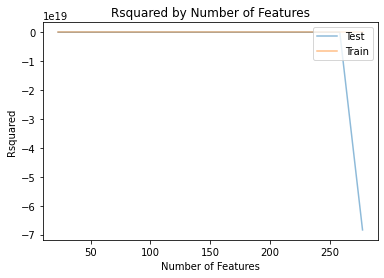

In [17]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [ ]:
'''
The below program and provided visualization is used to answer our third question, what additional features 
make a listing successfull.

From the visual provided, we can see that the top three most impactful additional features to make a listing succesful 
are to provide:

1. A private room
2. A real Bed
3. The most successful property type is a house


'''

In [18]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(50)

,est_int,coefs,abs_coefs
94,room_type_Private room,1.398930e+13,1.398930e+13
28,Private room,-1.398930e+13,1.398930e+13
31,Real Bed,-1.145743e+13,1.145743e+13
95,bed_type_Real Bed,1.145743e+13,1.145743e+13
93,property_type_House,-8.581373e+12,8.581373e+12
30,House,8.581373e+12,8.581373e+12
91,"smart_location_Seattle, WA",4.529513e+12,4.529513e+12
77,city_Seattle,-4.529513e+12,4.529513e+12
2,host_total_listings_count,-1.939734e+12,1.939734e+12
1,host_listings_count,1.939734e+12,1.939734e+12
